In [6]:
import scanpy, numpy, matplotlib, pandas

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [44]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [50]:
scanpy.set_figure_params(fontsize=20, figsize=(8, 5), format='tiff')

In [3]:
# from http://godsnotwheregodsnot.blogspot.de/2012/09/color-distribution-methodology.html
# from https://github.com/scverse/scanpy/blob/master/scanpy/plotting/palettes.py
godsnot_102 = [# "#000000",  # remove the black, as often, we have black colored annotation
                "#FFFF00","#1CE6FF","#FF34FF","#FF4A46","#008941","#006FA6","#A30059","#FFDBE5",
                "#7A4900","#0000A6","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007",
                "#809693","#6A3A4C","#1B4400","#4FC601","#3B5DFF","#4A3B53","#FF2F80","#61615A",
                "#BA0900","#6B7900","#00C2A0","#FFAA92","#FF90C9","#B903AA","#D16100","#DDEFFF",
                "#000035","#7B4F4B","#A1C299","#300018","#0AA6D8","#013349","#00846F","#372101",
                "#FFB500","#C2FFED","#A079BF","#CC0744","#C0B9B2","#C2FF99","#001E09","#00489C",
                "#6F0062","#0CBD66","#EEC3FF","#456D75","#B77B68","#7A87A1","#788D66","#885578",
                "#FAD09F","#FF8A9A","#D157A0","#BEC459","#456648","#0086ED","#886F4C","#34362D",
                "#B4A8BD","#00A6AA","#452C2C","#636375","#A3C8C9","#FF913F","#938A81","#575329",
                "#00FECF","#B05B6F","#8CD0FF","#3B9700","#04F757","#C8A1A1","#1E6E00","#7900D7",
                "#A77500","#6367A9","#A05837","#6B002C","#772600","#D790FF","#9B9700","#549E79",
                "#FFF69F","#201625","#72418F","#BC23FF","#99ADC0","#3A2465","#922329","#5B4534",
                "#FDE8DC","#404E55","#0089A3","#CB7E98","#A4E804","#324E72"]
x = godsnot_102 + godsnot_102
two_hundred_colors = x[:200]
print(len(two_hundred_colors))

200


In [4]:
iso1 = 'ENST00000354449.7'
iso2 = 'ENST00000354956.9'

In [11]:
%%time
#Open the big expression data with all the transcripts
path = output_file_directory + "/dataframes_for_input/all_transcripts_zscore.tsv"
adata  = scanpy.read_csv(path, delimiter='\t')

print(adata.shape)

(46490, 4385)


AttributeError: 'AnnData' object has no attribute 'head'

# PCA

In [17]:
path2  = output_file_directory + 'ATG7/TCGA_GTEX/transcripts/'

C:\Users\kja11\anaconda3\lib\site-packages\umap\umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


C:\Users\kja11\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


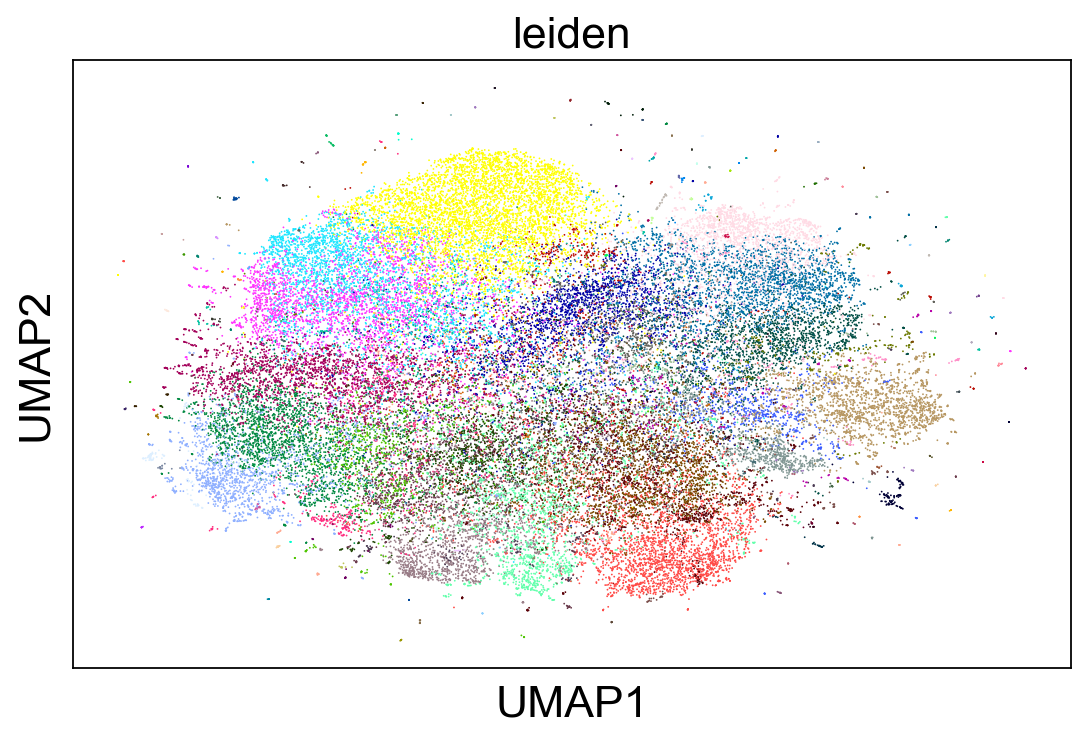

Wall time: 47.3 s


In [51]:
%%time

nei = 5
dist = 0.2
spre = 10
scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
scanpy.tl.leiden(adata)
scanpy.tl.paga(adata)
scanpy.pl.paga(adata, plot=False)
scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')      
scanpy.pl.umap(adata, color='leiden', palette=two_hundred_colors, legend_loc=None, save='_all')

# umap and leiden

C:\Users\kja11\anaconda3\lib\site-packages\umap\umap_.py:1356: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


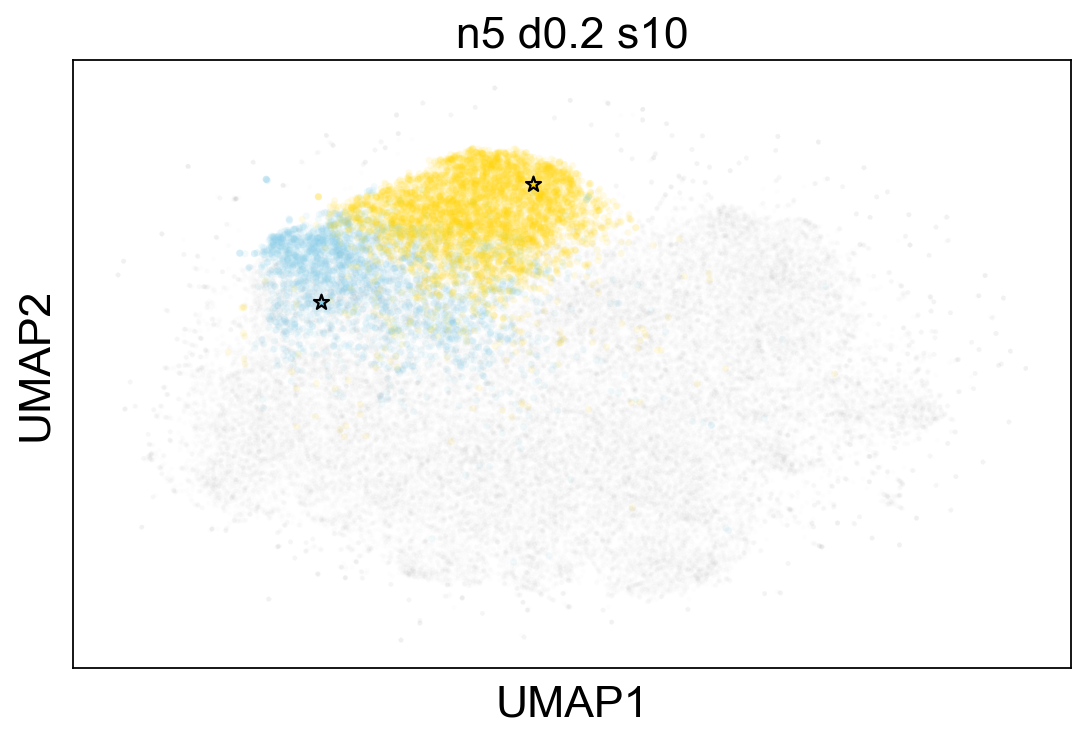

Wall time: 49.8 s


In [49]:
%%time
# neis 5, spre 10 and then explore multiple values
neis = [5]
dists = [0.2]
spres = [10]

for nei in neis:
    for dist in dists:
        for spre in spres:
            # initial exploration
            scanpy.pp.neighbors(adata, n_neighbors=nei, n_pcs=100)
            scanpy.tl.leiden(adata)
            scanpy.tl.paga(adata)
            scanpy.pl.paga(adata, plot=False)
            scanpy.tl.umap(adata, min_dist=dist, spread=spre, init_pos='paga')         
            
            # dealing with colors
            umap0 = adata.obsm['X_umap'][:, 0]
            umap1 = adata.obsm['X_umap'][:, 1]

            group1x = []; group1y = []
            group2x = []; group2y = []
            othersx = []; othersy = []

            for i in range(len(adata.obs.index)):

                transcript = adata.obs.index[i]
                label = adata.obs.loc[transcript, 'leiden']
                x = adata.obsm['X_umap'][i, 0] 
                y = adata.obsm['X_umap'][i, 1]

                if label == adata.obs.loc[iso1, 'leiden']:
                    group1x.append(x); group1y.append(y)
                elif label == adata.obs.loc[iso2, 'leiden']:
                    group2x.append(x); group2y.append(y)
                else:
                    othersx.append(x); othersy.append(y)

            matplotlib.pyplot.scatter(group1x, group1y, s=10, c='skyblue', alpha=0.1, edgecolors='none')
            matplotlib.pyplot.scatter(group2x, group2y, s=10, c='gold', alpha=0.1, edgecolors='none')
            matplotlib.pyplot.scatter(othersx, othersy, s=5, c='gray', alpha=0.01, edgecolors='none')

            # location of iso1 and iso2
            position1 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso1), :]
            position2 = adata.obsm['X_umap'][adata.obs.index.get_loc(iso2), :]
            matplotlib.pyplot.scatter(position1[0], position1[1], s=50, c='skyblue', edgecolors='black', marker='*')
            matplotlib.pyplot.scatter(position2[0], position2[1], s=50, c='gold', marker='*', edgecolors='black')

            matplotlib.pyplot.title('n{} d{} s{}'.format(nei, dist, spre))
            matplotlib.pyplot.xlabel('UMAP1')
            matplotlib.pyplot.ylabel('UMAP2')
            matplotlib.pyplot.xticks([])
            matplotlib.pyplot.yticks([])
            matplotlib.pyplot.savefig(path2+'umap_iso1_2.tiff')
            matplotlib.pyplot.show()